# Stock Market Analysis and Prediction: Leveraging Data Science for Insights

### Table of Contents

By following this roadmap, readers can gain a comprehensive understanding of the stock market, learn how to leverage Data Science for financial analysis, and optimize investment strategies for maximum returns. Let's get started!

1. [Introduction](#introduction)  

2. [Data Collection and Preprocessing](#data-collection-and-preprocessing)  
    - [key libraries](#stock-data-retrieval-with-apis)   
   - [Stock Data Retrieval with APIs](#stock-data-retrieval-with-apis)  
   - [Data Cleaning and Formatting](#data-cleaning-and-formatting)  
   - [Feature Engineering for Machine Learning](#feature-engineering-for-machine-learning)  
     - [Technical Indicators](#technical-indicators)  
     - [Fundamental Metrics](#fundamental-metrics)  
   - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
     - [Cumulative Returns](#cumulative-returns)  
     - [Skewness and Kurtosis](#skewness-and-kurtosis)  
     - [Pairplots and Correlation Matrix](#pairplots-and-correlation-matrix)  

3. [Descriptive Financial Metrics](#descriptive-financial-metrics)  
   - [Performance Metrics](#performance-metrics)  
     - [Beta and Alpha](#beta-and-alpha)  
     - [Sharpe Ratio](#sharpe-ratio)  
   - [Risk Analysis and Volatility](#risk-analysis-and-volatility)  

4. [Machine Learning for Financial Insights](#machine-learning-for-financial-insights)  
   - [Predictive Modeling](#predictive-modeling)  
     - [Stock Price Forecasting](#stock-price-forecasting)  
     - [Volatility Prediction](#volatility-prediction)  
   - [Classification Tasks](#classification-tasks)  
     - [Stock Movement Prediction](#stock-movement-prediction)  
     - [Risk Categorization](#risk-categorization)  
   - [Clustering for Stock Grouping](#clustering-for-stock-grouping)  
   - [Model Evaluation Metrics](#model-evaluation-metrics)  

5. [Portfolio Optimization](#portfolio-optimization)  
   - [What is a Portfolio?](#what-is-a-portfolio)  
   - [Markowitz Mean-Variance Optimization](#markowitz-mean-variance-optimization)  
   - [Black-Litterman Allocation Model](#black-litterman-allocation-model)  
     - [Prior](#prior)  
     - [Views](#views)  
     - [Confidences](#confidences)  
   - [Reinforcement Learning for Portfolio Optimization](#reinforcement-learning-for-portfolio-optimization)  

6. [Backtesting Investment Strategies](#backtesting-investment-strategies)  
   - [Technical Strategy Backtesting](#technical-strategy-backtesting)  
     - [RSI and Moving Average Crossover](#rsi-and-moving-average-crossover)  
     - [Hourly, Daily, and Weekly Data](#hourly-daily-and-weekly-data)  
   - [Comparing ML-Based vs. Traditional Approaches](#comparing-ml-based-vs-traditional-approaches)  

7. [Advanced Machine Learning Applications](#advanced-machine-learning-applications)  
   - [Deep Learning for Sequential Data](#deep-learning-for-sequential-data)  
   - [Anomaly Detection in Stock Behavior](#anomaly-detection-in-stock-behavior)  
   - [Reinforcement Learning for Dynamic Strategies](#reinforcement-learning-for-dynamic-strategies)  

8. [Insights and Conclusions](#insights-and-conclusions)  
   - [Summary of Findings](#summary-of-findings)  
   - [Actionable Insights for Investors](#actionable-insights-for-investors)  
   - [Limitations and Future Work](#limitations-and-future-work)  


# Introduction
____

This notebook explores the intersection of Data Science and finance through the analysis of stock data for four prominent technology companies: Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN).

**Objective:**

The primary objective of this project is to demonstrate how Python and Data Science techniques can be effectively utilized to analyze stock market trends, evaluate investment performance, and ultimately optimize investment strategies.

**Problem Statement:**

The stock market presents a complex and dynamic environment. Investors face numerous challenges, including:

* **Identifying profitable investment opportunities:** Understanding market trends, evaluating company performance, and predicting future stock prices are crucial for making informed investment decisions.
* **Managing risk:** Effectively assessing and mitigating investment risks is essential to protect capital and achieve long-term financial goals.
* **Optimizing portfolio allocation:** Determining the optimal allocation of assets across different stocks and asset classes is a critical aspect of portfolio management.

This project aims to address these challenges by:

* **Collecting and analyzing historical stock data:** Utilizing APIs to retrieve stock prices, financial statements, and other relevant data.

* **Employing data preprocessing and feature engineering techniques:** Cleaning, transforming, and creating new features from raw data to enhance analysis and model performance.

* **Calculating key financial metrics:** Evaluating stock performance using metrics such as beta, alpha, Sharpe Ratio, and volatility.

* **Implementing machine learning models:** Developing predictive models for stock price forecasting, volatility prediction, and stock movement classification.

* **Optimizing portfolio allocation:** Applying portfolio optimization techniques, including Markowitz Mean-Variance Optimization and Black-Litterman allocation, to construct efficient portfolios.

* **Backtesting investment strategies:** Evaluating the performance of different trading strategies, including technical analysis-based and machine learning-based approaches, using historical data.

By following the steps outlined in this notebook, readers will gain a practical understanding of how Data Science can be applied to the financial domain, empowering them to make more informed investment decisions and potentially improve their investment outcomes.





As a finance data analyst, understanding how to analyze the stock market is a fundamental skill that bridges the gap between raw data and actionable financial insights. The purpose of this notebook is to demonstrate essential skills in financial analysis, leveraging Python and data science techniques to extract meaningful insights from stock market data. By diving into practical examples, this project aims to showcase how data-driven decisions can be applied in the real world to optimize investments and enhance portfolio management.

For this analysis, I have carefully chosen four prominent stocks: **Apple (AAPL)**, **Microsoft (MSFT)**, **Google (Alphabet) (GOOGL)**, and **Amazon (AMZN)**. These companies share key characteristics that make them highly relevant for financial analysis:

1. **Market Leaders**: These stocks belong to some of the largest companies in the world by market capitalization, dominating their respective industries—technology, e-commerce, and cloud computing.
   
2. **Innovation and Growth**: They are known for their consistent innovation and ability to adapt, making them pivotal players in driving technological and economic trends globally.

3. **Broad Investor Interest**: Their stocks are widely traded and held by a diverse range of institutional and retail investors, making them representative of broader market movements.

4. **Global Influence**: These companies operate on a global scale, impacting multiple sectors and economies, which adds complexity and richness to their market behavior.

Through this analysis, I aim to provide a detailed exploration of their historical stock performance, identify key financial metrics, and develop predictive insights. The focus is not just on theoretical concepts but on practical, actionable results that showcase the power of combining finance and data science.


# Data Collection and Preprocessing
____

## Key Libraries

The success of this project hinges on leveraging powerful Python libraries that enable financial analysis, portfolio optimization, and technical analysis. These libraries form the backbone of the notebook, facilitating data retrieval, manipulation, visualization, and modeling. Below is an overview of the key libraries used and their specific contributions to the project:


- **`yfinance`** 
  A popular library that provides access to historical stock price data, financial statements, and other key metrics for a wide range of stocks. It is a valuable resource for extracting stock data directly from Yahoo Finance for analysis.
  ```python
  !pip install yfinance
  import yfinance as yf
  ```

- **`Quantstats`** 
  This library specializes in quantitative finance, offering tools for analyzing investment strategies, backtesting, and evaluating portfolio performance. It provides a comprehensive suite of functions for detailed financial analysis and visualization of key metrics.
  ```python
  !pip install quantstats
  import quantstats as qs
  ```


- **`PyPortfolioOpt`**
  This library focuses on portfolio optimization, enabling users to construct optimal portfolios based on various criteria such as risk, return, and constraints. It is a powerful tool for optimizing investment strategies, including mean-variance optimization and Black-Litterman models.

  ```python
  !pip install PyPortfolioOpt
  from pypfopt.efficient_frontier import EfficientFrontier
  from pypfopt import risk_models
  from pypfopt import expected_returns
  from pypfopt import plotting
  ```


- **`TA-Lib`** 
  A Technical Analysis Library (TA-Lib) offers a wide range of technical indicators for analyzing stock price data. It includes functions for calculating moving averages, RSI, MACD, Bollinger Bands, and other commonly used technical indicators.

  ```python
  !pip install TA-Lib
  import talib
  ```

- **`Plotly`**
  This library offers interactive visualization capabilities, allowing users to create dynamic and engaging plots for exploring stock data. It provides tools for creating interactive charts, dashboards, and visualizations.

  ```python
  !pip install plotly
  import plotly.express as px
  import plotly.graph_objects as go
  ```

Other commonly used libraries: 

- **`Pandas`**
  This library is essential for data manipulation and analysis, allowing us to handle and preprocess stock data efficiently. It provides powerful data structures and functions for cleaning, transforming, and analyzing financial data.

- **`Numpy`**
  A fundamental library for numerical computing, Numpy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **`Matplotlib and Seaborn`**
  This combination of libraries is used for data visualization, enabling the creation of informative plots, charts, and graphs to visualize trends, patterns, and relationships in the stock data.

- **`Scikit-Learn`**
  A machine learning library that provides a wide range of tools for building predictive models, evaluating performance, and optimizing parameters. It includes functions for regression, classification, clustering, and model evaluation.

By combining these libraries with Python's robust data science capabilities, we can unlock the full potential of financial analysis and stock market prediction. The subsequent sections will delve into the process of collecting, preprocessing, and analyzing stock data to derive actionable insights for investors.

## Data Retrieval with APIs: Stock Daily Returns

To initiate our analysis, we will retrieve historical stock price data for four prominent technology companies: 
- Apple: aapl

- Microsoft: msft

- Google (Alphabet): googl

- Amazon: amzn

We will utilize the `yfinance` library to extract this data directly from Yahoo Finance, a popular source for financial information. These companies were selected due to their significant market capitalization, technological innovation, and widespread global influence, making them representative of the technology sector and attractive for investment analysis.  The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. Let's begin by importing the necessary  stock data.

The timeframe for this analysis will be from January 1, 2010, to December 31, 2021, covering over a decade of historical stock performance. This extended period will allow us to capture long-term trends, volatility, and key events that have shaped the stock market landscape. By analyzing this data, we can gain valuable insights into the historical performance of these companies and identify patterns that may inform future investment decisions.


In [568]:
import quantstats as qs
import pandas as pd

# Define the time window
start = '2010-01-01'
end = '2021-12-31'

# Get returns for each stock within the defined time window
aapl = qs.utils.download_returns('AAPL').loc[start:end]
msft = qs.utils.download_returns('MSFT').loc[start:end]
googl = qs.utils.download_returns('GOOGL').loc[start:end]
amzn = qs.utils.download_returns('AMZN').loc[start:end]

# Save data to CSV files
aapl.to_csv('aapl_returns.csv')
msft.to_csv('msft_returns.csv')
googl.to_csv('googl_returns.csv')
amzn.to_csv('amzn_returns.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [569]:
# Load data from CSV files
aapl_returns = pd.read_csv('aapl_returns.csv', index_col=0, parse_dates=True) 
msft_returns = pd.read_csv('msft_returns.csv', index_col=0, parse_dates=True) 
googl_returns = pd.read_csv('googl_returns.csv', index_col=0, parse_dates=True) 
amzn_returns = pd.read_csv('amzn_returns.csv', index_col=0, parse_dates=True) 

## Data Cleaning and Formatting: Stock Daily Returns

Timezones in DatetimeIndex:    
When working with financial data, it's crucial to be aware of timezones. As our data contains stock retutns, and dates are in UTC timezone, we will specifically converts the `timezone-aware DatetimeIndex` to a timezone-naive DatetimeIndex.    

A timezone-naive DatetimeIndex does not have any timezone information associated with it. This conversion is essential for consistency and compatibility with various financial analysis tools and libraries.





In [570]:
# view the data
aapl_returns.head()

,AAPL
Date,
2010-01-04 00:00:00+00:00,0.015565
2010-01-05 00:00:00+00:00,0.001729
2010-01-06 00:00:00+00:00,-0.015906
2010-01-07 00:00:00+00:00,-0.001849
2010-01-08 00:00:00+00:00,0.006648


In [571]:
# converting time zone to none
aapl_returns.index = aapl_returns.index.tz_convert(None)
msft_returns.index = msft_returns.index.tz_convert(None)
googl_returns.index = googl_returns.index.tz_convert(None)
amzn_returns.index = amzn_returns.index.tz_convert(None)

In [572]:
# Rename the columns
aapl_returns.columns = ['returns'] 
msft_returns.columns = ['returns']
googl_returns.columns = ['returns']
amzn_returns.columns = ['returns']

In [573]:
# Display the first few rows of the appl_data
aapl_returns.head()

,returns
Date,
2010-01-04,0.015565
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648


## Data Retrieval with APIs: Historical stock price

The first step is to retrieve historical stock price data for the selected companies using the `yfinance` library. We will extract daily stock prices, including the opening, high, low, closing prices, and trading volume, for the specified timeframe. This data will serve as the foundation for calculating technical indicators and fundamental metrics.

Due to the types of data, we will have to clean the data and convert the timezone-aware DatetimeIndex to a timezone-naive DatetimeIndex. This conversion is essential for consistency and compatibility with various financial analysis tools and libraries.

In [597]:
#import yfinance
import yfinance as yf

# Define the time window
start = '2010-01-01'
end = '2021-12-31'

# Get historical data for each stock within the defined time window
aapl_historical = yf.download('AAPL', start=start, end=end)
msft_historical = yf.download('MSFT', start=start, end=end)
googl_historical = yf.download('GOOGL', start=start, end=end)
amzn_historical = yf.download('AMZN', start=start, end=end)

# Save data to CSV files
aapl_historical.to_csv('aapl_price.csv')
msft_historical.to_csv('msft_price.csv')
googl_historical.to_csv('googl_price.csv')
amzn_historical.to_csv('amzn_price.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [658]:
# Load data from CSV files
aapl_price = pd.read_csv('aapl_price.csv', index_col=0, parse_dates=True) 
msft_price = pd.read_csv('msft_price.csv', index_col=0, parse_dates=True) 
googl_price = pd.read_csv('googl_price.csv', index_col=0, parse_dates=True) 
amzn_price = pd.read_csv('amzn_price.csv', index_col=0, parse_dates=True) 

## Data Cleaning and Formatting: Historical Stock Data

In [659]:
# view the data to check if it was loaded correctly
aapl_price.head()

,Adj Close,Close,High,Low,Open,Volume
Price,,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04 00:00:00+00:00,6.44741153717041,7.643214225769043,7.660714149475098,7.585000038146973,7.622499942779541,493729600
2010-01-05 00:00:00+00:00,6.458559036254883,7.656428813934326,7.699643135070801,7.6160712242126465,7.664286136627197,601904800
2010-01-06 00:00:00+00:00,6.355825424194336,7.534643173217773,7.68678617477417,7.526785850524902,7.656428813934326,552160000


In [660]:
# drop the columns that are not needed
aapl_price = aapl_price.drop(['Adj Close'], axis=1)
msft_price = msft_price.drop(['Adj Close'], axis=1)
googl_price = googl_price.drop(['Adj Close'], axis=1)
amzn_price = amzn_price.drop(['Adj Close'], axis=1)

In [661]:
# reset the index to remove the multi-index
aapl_price.reset_index(inplace=True)
msft_price.reset_index(inplace=True)
googl_price.reset_index(inplace=True)
amzn_price.reset_index(inplace=True)

In [662]:
# clean the columns headers to make them uniform
def clean_columns_headers(df):
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    return df

aapl_price = clean_columns_headers(aapl_price)
msft_price = clean_columns_headers(msft_price)
googl_price = clean_columns_headers(googl_price)
amzn_price = clean_columns_headers(amzn_price)


In [663]:
# drop rows with missing values, and drop the first row
def drop_rows(df):
    df.dropna(inplace=True)
    df.drop(index=0, inplace=True)
    return df

aapl_price = drop_rows(aapl_price)
msft_price = drop_rows(msft_price)
googl_price = drop_rows(googl_price)
amzn_price = drop_rows(amzn_price)

In [664]:
# Rename the first column to 'date'
aapl_price.rename(columns={'price':'date'}, inplace=True)
msft_price.rename(columns={'price':'date'}, inplace=True)
googl_price.rename(columns={'price':'date'}, inplace=True)
amzn_price.rename(columns={'price':'date'}, inplace=True)

In [665]:
# view the data to check the changes
aapl_price.head()

,date,close,high,low,open,volume
2,2010-01-04 00:00:00+00:00,7.643214225769043,7.660714149475098,7.585000038146973,7.622499942779541,493729600
3,2010-01-05 00:00:00+00:00,7.656428813934326,7.699643135070801,7.6160712242126465,7.664286136627197,601904800
4,2010-01-06 00:00:00+00:00,7.534643173217773,7.68678617477417,7.526785850524902,7.656428813934326,552160000
5,2010-01-07 00:00:00+00:00,7.520713806152344,7.5714287757873535,7.466071128845215,7.5625,477131200
6,2010-01-08 00:00:00+00:00,7.570713996887207,7.5714287757873535,7.466429233551025,7.510714054107666,447610800


In [666]:
# check the data types of the columns
aapl_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 2 to 3021
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3020 non-null   object
 1   close   3020 non-null   object
 2   high    3020 non-null   object
 3   low     3020 non-null   object
 4   open    3020 non-null   object
 5   volume  3020 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


In [667]:
# convert the data types of the columns to float
def convert_data_types(df):
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)
    df['volume'] = df['volume'].astype(float)
    df['date'] = pd.to_datetime(df['date'])
    return df


# convert the data types of the columns to float
aapl_price = convert_data_types(aapl_price)
msft_price = convert_data_types(msft_price)
googl_price = convert_data_types(googl_price)
amzn_price = convert_data_types(amzn_price)

In [668]:
# Setting the date as the index
aapl_price.set_index('date', inplace=True)
msft_price.set_index('date', inplace=True)
googl_price.set_index('date', inplace=True)
amzn_price.set_index('date', inplace=True)

In [669]:
# convert the time zone to none
aapl_price.index = aapl_price.index.tz_convert(None)
msft_price.index = msft_price.index.tz_convert(None)
googl_price.index = googl_price.index.tz_convert(None)
amzn_price.index = amzn_price.index.tz_convert(None)


In [670]:
# view the data to check the changes
aapl_price.head()

,close,high,low,open,volume
date,,,,,
2010-01-04,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08,7.570714,7.571429,7.466429,7.510714,447610800.0


## Feature Engineering for Machine Learning

The success of machine learning models in financial analysis hinges on the quality and relevance of the features used for prediction. Feature engineering plays a critical role in extracting meaningful insights from raw data and enhancing the performance of predictive models. In this section, we will create a set of features that capture essential aspects of stock market behavior, including `technical indicators` and `fundamental metrics`.

The focus is on generating features that are relevant, informative, and predictive of future stock price movements. By combining technical indicators, fundamental metrics, and other relevant features, we aim to develop a comprehensive feature set that can be used for machine learning-based stock price forecasting, volatility prediction, and classification tasks.

####  Technical Indicators

Technical indicators are mathematical calculations based on historical price and volume data that provide insights into market trends, momentum, volatility, and other key aspects of stock behavior. These indicators are widely used by traders and analysts to make informed decisions about buying, selling, or holding stocks. In this project, we will create a set of popular technical indicators that can be used as features for machine learning models.

Technical indicators are mathematical calculations derived from historical price, volume, or open interest data in financial markets. They are widely used by traders, investors, and analysts to make informed decisions regarding market trends, momentum, and potential price movements. These indicators serve as tools to evaluate the behavior of securities and predict future market conditions, providing a quantitative basis for decision-making.

* Categories of Technical Indicators
	1.	**Trend Indicators**: These indicators identify the direction of market movements and help traders determine whether a market is in an uptrend, downtrend, or consolidating. Examples include:
		- `Moving Averages (MA)`: Smooths out price data to identify trends over time.
		- `Exponential Moving Average (EMA)`: Gives more weight to recent prices for faster responses to price changes.
		- `MACD (Moving Average Convergence Divergence)`: Highlights changes in momentum and trend direction.
		- `Parabolic SAR`: Indicates potential reversals in market trends.	

	2.	**Momentum Indicators**: These indicators measure the speed and strength of price movements, helping traders identify overbought or oversold conditions. Examples include:
		- `Relative Strength Index (RSI)`: Measures the magnitude of recent price changes to evaluate overbought or oversold conditions.
		- `Stochastic Oscillator`: Compares a security's closing price to its price range over a specific period.
		- `Rate of Change (ROC)`: Measures the percentage change in price between the current price and a past price.

	3.	**Volatility Indicators**: These indicators quantify the degree of price fluctuations in the market, helping traders assess risk and potential price movements. Examples include:
		- `Bollinger Bands`: Consist of a moving average and two standard deviation bands to identify price volatility.
		- `Average True Range (ATR)`: Measures market volatility by calculating the average range between price highs and lows.
		- `Keltner Channels`: Similar to Bollinger Bands, but use average true range to set channel boundaries.

	4.	**Volume Indicators**: These indicators analyze trading volume to assess the strength of price movements and identify potential reversals. Examples include:
		- `On-Balance Volume (OBV)`: Tracks cumulative volume to predict price movements.
		- `Accumulation/Distribution Line`: Combines price and volume data to assess the flow of money in and out of a security.
		- `Chaikin Money Flow (CMF)`: Measures the buying and selling pressure for a security.




### Trend Indicators measures: 

- **Moving Averages (MA):**    
A moving average is a widely used technical indicator that smooths out price data to identify trends over time. It calculates the average price of a security over a specified period, providing a clearer picture of the underlying trend. Moving averages are commonly used to identify support and resistance levels, trend direction, and potential entry or exit points for trades.

In [671]:
aapl_price.head()

,close,high,low,open,volume
date,,,,,
2010-01-04,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08,7.570714,7.571429,7.466429,7.510714,447610800.0


In [672]:
# Simple Moving Average (SMA)
aapl_price['sma_20'] = aapl_price['close'].rolling(window=20).mean()
msft_price['sma_20'] = msft_price['close'].rolling(window=20).mean()
googl_price['sma_20'] = googl_price['close'].rolling(window=20).mean()
amzn_price['sma_20'] = amzn_price['close'].rolling(window=20).mean()

- **Exponential Moving Average (EMA):**   
The exponential moving average is a type of moving average that gives more weight to recent prices, making it more responsive to price changes. It is calculated by applying a smoothing factor to the previous period's EMA and the current price. The EMA reacts faster to price movements than the simple moving average, making it popular among traders looking for timely signals.

In [673]:
# Exponential Moving Average (EMA)
aapl_price['ema_20'] = aapl_price['close'].ewm(span=20, adjust=False).mean()
msft_price['ema_20'] = msft_price['close'].ewm(span=20, adjust=False).mean()
googl_price['ema_20'] = googl_price['close'].ewm(span=20, adjust=False).mean()
amzn_price['ema_20'] = amzn_price['close'].ewm(span=20, adjust=False).mean()

- ** MACD (Moving Average Convergence Divergence)**
The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. It consists of the MACD line, signal line, and histogram. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA, while the signal line is the 9-period EMA of the MACD line. The histogram represents the difference between the MACD line and the signal line. The MACD is used to identify changes in trend direction, momentum, and potential buy or sell signals.

In [674]:
import talib

# Define the parameters for the MACD calculation
fastperiod = 12
slowperiod = 26
signalperiod = 9

aapl_price['MACD'], aapl_price['MACD_signal'], _ = talib.MACD(aapl_price['close'], fastperiod, slowperiod, signalperiod)
msft_price['MACD'], msft_price['MACD_signal'], _ = talib.MACD(msft_price['close'], fastperiod, slowperiod, signalperiod)
googl_price['MACD'], googl_price['MACD_signal'], _ = talib.MACD(googl_price['close'], fastperiod, slowperiod, signalperiod)
amzn_price['MACD'], amzn_price['MACD_signal'], _ = talib.MACD(amzn_price['close'], fastperiod, slowperiod, signalperiod)



In [675]:
aapl_price

,close,high,low,open,volume,sma_20,ema_20,MACD,MACD_signal
date,,,,,,,,,
2010-01-04,7.643214,7.660714,7.585000,7.622500,493729600.0,NaN,7.643214,NaN,NaN
2010-01-05,7.656429,7.699643,7.616071,7.664286,601904800.0,NaN,7.644473,NaN,NaN
2010-01-06,7.534643,7.686786,7.526786,7.656429,552160000.0,NaN,7.634013,NaN,NaN
2010-01-07,7.520714,7.571429,7.466071,7.562500,477131200.0,NaN,7.623222,NaN,NaN
2010-01-08,7.570714,7.571429,7.466429,7.510714,447610800.0,NaN,7.618222,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-23,176.279999,176.850006,175.270004,175.850006,68356600.0,170.2870,170.028505,4.805845,5.205320
2021-12-27,180.330002,180.419998,177.070007,177.089996,74919600.0,171.4630,171.009600,5.051209,5.174498
2021-12-28,179.289993,181.330002,178.529999,180.160004,79144300.0,172.4155,171.798209,5.102919,5.160182


In [676]:
msft_price

,close,high,low,open,volume,sma_20,ema_20,MACD,MACD_signal
date,,,,,,,,,
2010-01-04,30.950001,31.100000,30.590000,30.620001,38409100.0,NaN,30.950001,NaN,NaN
2010-01-05,30.959999,31.100000,30.639999,30.850000,49749600.0,NaN,30.950953,NaN,NaN
2010-01-06,30.770000,31.080000,30.520000,30.879999,58182400.0,NaN,30.933719,NaN,NaN
2010-01-07,30.450001,30.700001,30.190001,30.629999,50559700.0,NaN,30.887651,NaN,NaN
2010-01-08,30.660000,30.879999,30.240000,30.280001,51197400.0,NaN,30.865970,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-23,334.690002,336.390015,332.730011,332.750000,19617800.0,330.869000,330.786436,0.155526,0.698788
2021-12-27,342.450012,342.480011,335.429993,335.459991,19947000.0,331.507501,331.897253,1.097262,0.778483
2021-12-28,341.250000,343.809998,340.320007,343.149994,15661500.0,331.738501,332.787990,1.726858,0.968158


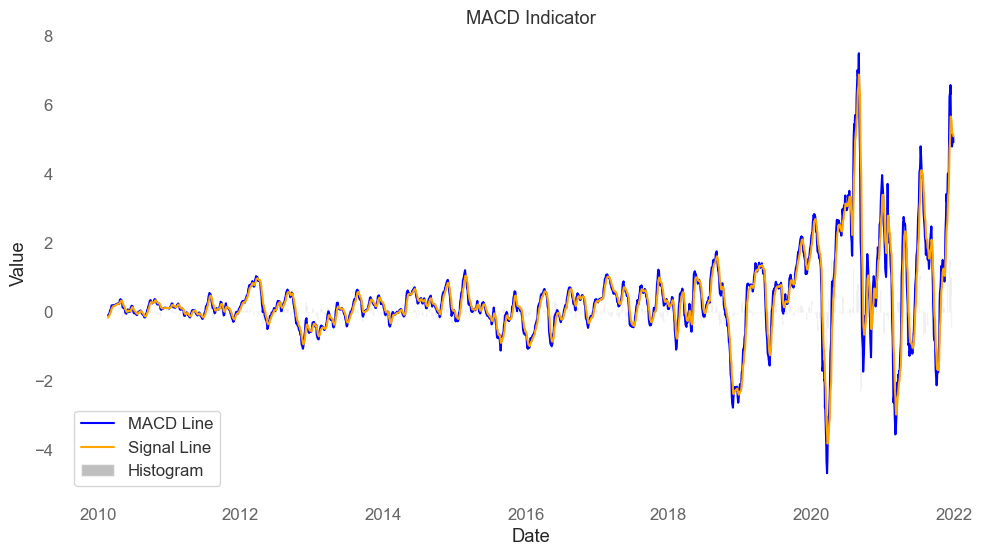

In [678]:
import matplotlib.pyplot as plt

# Plot MACD line
plt.figure(figsize=(12, 6))
plt.plot(aapl_price.index, aapl_price['MACD'], label='MACD Line', color='blue', linewidth=1.5)

# Plot Signal Line
plt.plot(aapl_price.index, aapl_price['MACD_signal'], label='Signal Line', color='orange', linewidth=1.5)

# Optional: Plot Histogram as bars
histogram = aapl_price['MACD'] - aapl_price['MACD_signal']
plt.bar(aapl_price.index, histogram, label='Histogram', color='gray', alpha=0.5)

# Add labels and legend
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Show the plot
plt.show()


#### Fundamental Metrics

In addition to technical indicators, fundamental metrics provide valuable insights into a company's financial health, performance, and valuation. These metrics are derived from financial statements, earnings reports, and other fundamental data sources, offering a comprehensive view of a company's operations and prospects. By incorporating fundamental metrics into our feature set, we can enhance the predictive power of our machine learning models and gain a deeper understanding of the factors driving stock price movements.

Fundamental metrics are quantitative data points derived from a company's financial statements, earnings reports, and other fundamental data sources. These metrics provide insights into a company's financial health, performance, valuation, and growth prospects, helping investors make informed decisions about stock investments. By analyzing fundamental metrics, investors can assess the intrinsic value of a company, evaluate its competitive position, and identify potential investment opportunities.


* Categories of Fundamental Metrics
	1.	**Valuation Metrics**: These metrics assess the relative value of a company's stock by comparing its market price to fundamental indicators such as earnings, book value, and cash flow. Examples include:
		- `Price-to-Earnings (P/E) Ratio`: Compares a company's stock price to its earnings per share to evaluate valuation.
		- `Price-to-Book (P/B) Ratio`: Compares a company's stock price to its book value per share to assess valuation.
		- `Price-to-Sales (P/S) Ratio`: Compares a company's stock price to its revenue per share to evaluate valuation.

	2.	**Profitability Metrics**: These metrics measure a company's ability to generate profits and manage costs effectively. Examples include:
		- `Return on Equity (ROE)`: Measures a company's profitability by evaluating its return on shareholders' equity.
		- `Net Profit Margin`: Measures the percentage of revenue that translates into profit after accounting for expenses.
		- `Operating Margin`: Measures the percentage of revenue that translates into profit after accounting for operating expenses.

	3.	**Growth Metrics**: These metrics assess a company's growth prospects and potential for future expansion. Examples include:
		- `Revenue Growth Rate`: Measures the percentage increase in a company's revenue over a specific period.
		- `Earnings Growth Rate`: Measures the percentage increase in a company's earnings over a specific period.
		- `Dividend Yield`: Measures the percentage of dividends paid relative to a company's stock price.

	4.	**Financial Health Metrics**: These metrics evaluate a company's financial stability, liquidity, and debt levels. Examples include:
		- `Debt-to-Equity Ratio`: Measures a company's debt relative to its equity to assess financial leverage.
		- `Current Ratio`: Measures a company's ability to cover short-term liabilities with its short-term assets.
		- `Interest Coverage Ratio`: Measures a company's ability to pay interest on its debt with its earnings.